In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# if not %matplotlib inline then you would have to use plt.show() every time which could be boring if you have multiple plots

In [5]:
df = pd.read_csv('income.csv')

In [6]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


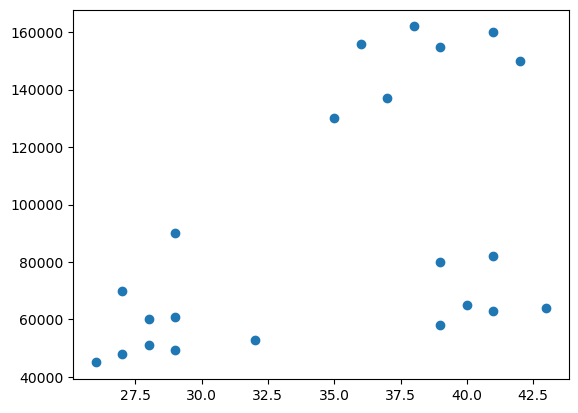

In [10]:
plt.scatter(df.Age,df['Income($)'])

In [12]:
km = KMeans(n_clusters = 3)

In [13]:
km.fit(df[['Age','Income($)']])

C:\Users\US593\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\US593\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
y_predict = km.predict(df[['Age','Income($)']])

In [16]:
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [22]:
df['cluter'] = y_predict

In [24]:
df.head()

,Name,Age,Income($),cluter
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [27]:
df1 = df[df.cluter==0]
df2 = df[df.cluter==1]
df3 = df[df.cluter==2]

In [28]:
df1.head()

,Name,Age,Income($),cluter
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0


Text(0, 0.5, 'Income')

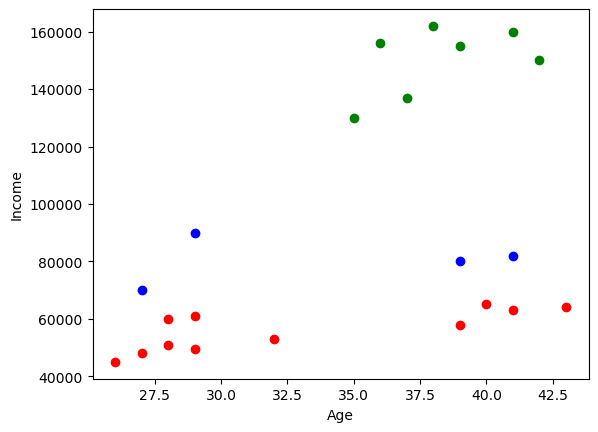

In [32]:
plt.scatter(df1.Age,df1['Income($)'],color = 'red')
plt.scatter(df2.Age,df2['Income($)'],color = 'green')
plt.scatter(df3.Age,df3['Income($)'],color = 'blue')
plt.xlabel('Age')
plt.ylabel('Income')

In [33]:
scaler = MinMaxScaler()

In [39]:
import numpy as np

In [40]:
df['Income($)'] = scaler.fit_transform(np.array(df['Income($)']).reshape(-1,1))

In [41]:
df.head()

,Name,Age,Income($),cluter
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [42]:
df['Age'] = scaler.fit_transform(np.array(df['Age']).reshape(-1,1))

In [44]:
km1 = KMeans(n_clusters = 3)

In [45]:
y_predict1 = km.fit_predict(df[['Age','Income($)']])

C:\Users\US593\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\US593\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [48]:
y_predict1

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [49]:
df['cluster'] = y_predict1

In [50]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

Text(0, 0.5, 'Income')

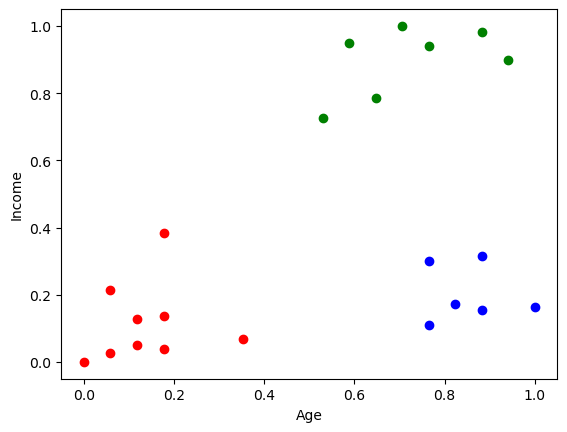

In [51]:
plt.scatter(df1.Age,df1['Income($)'],color = 'red')
plt.scatter(df2.Age,df2['Income($)'],color = 'green')
plt.scatter(df3.Age,df3['Income($)'],color = 'blue')
plt.xlabel('Age')
plt.ylabel('Income')

In [65]:
km.cluster_centers_ # centroids of every cluster

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [66]:
km.cluster_centers_[0] # centroid of cluster with class 0 with age as x-axis , income as y-axis

array([0.1372549 , 0.11633428])

In [67]:
km.cluster_centers_[1] # centroid of cluster with class 1 with age as x-axis , income as y-axis

array([0.72268908, 0.8974359 ])

In [68]:
km.cluster_centers_[2] # centroid of cluster with class 2 with age as x-axis , income as y-axis

array([0.85294118, 0.2022792 ])

Text(0, 0.5, 'Income')

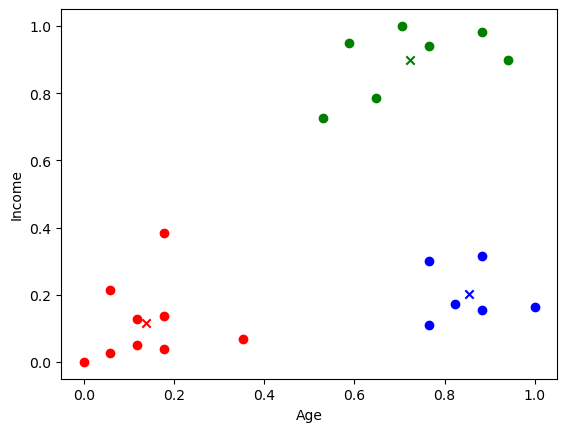

In [69]:
plt.scatter(df1.Age,df1['Income($)'],color = 'red')
plt.scatter(df2.Age,df2['Income($)'],color = 'green')
plt.scatter(df3.Age,df3['Income($)'],color = 'blue')
plt.scatter(km.cluster_centers_[0][0],km.cluster_centers_[0][1],color = 'red',marker = 'x')
plt.scatter(km.cluster_centers_[1][0],km.cluster_centers_[1][1],color = 'green',marker = 'x')
plt.scatter(km.cluster_centers_[2][0],km.cluster_centers_[2][1],color = 'blue',marker = 'x')
plt.xlabel('Age')
plt.ylabel('Income')

In [72]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\US593\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\US593\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\US593\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\US593\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [73]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2664030124668416,
 0.22443334487241418,
 0.16869711728567788,
 0.13265419827245162,
 0.10188787724979426]

Text(0.5, 1.0, 'Elbow Plot')

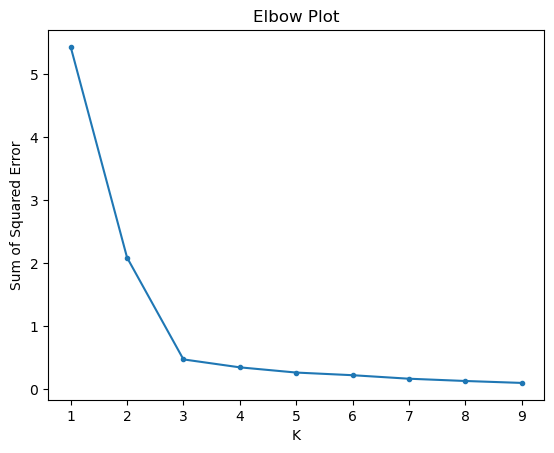

In [79]:
plt.plot(k_rng,sse,marker = '.')
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Plot')

In [80]:
# you can see that elbow is at three

# Exercise

In [81]:
from sklearn.datasets import load_iris

In [82]:
iris = load_iris()

In [84]:
data = pd.DataFrame(iris.data,columns = iris.feature_names)

In [86]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [87]:
x = data.iloc[:,:2]

In [89]:
x.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [90]:
x = scaler.fit_transform(x)

In [93]:
x = pd.DataFrame(x,columns = iris.feature_names[:2])

In [94]:
x

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667
...,...,...
145,0.666667,0.416667
146,0.555556,0.208333
147,0.611111,0.416667
148,0.527778,0.583333


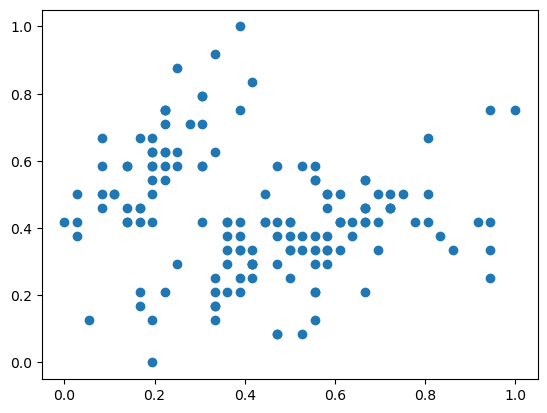

In [95]:
plt.scatter(x.iloc[:,0],x.iloc[:,1])

In [96]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(x)
    sse.append(km.inertia_)

C:\Users\US593\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\US593\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\US593\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\US593\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0.5, 1.0, 'Elbow Plot')

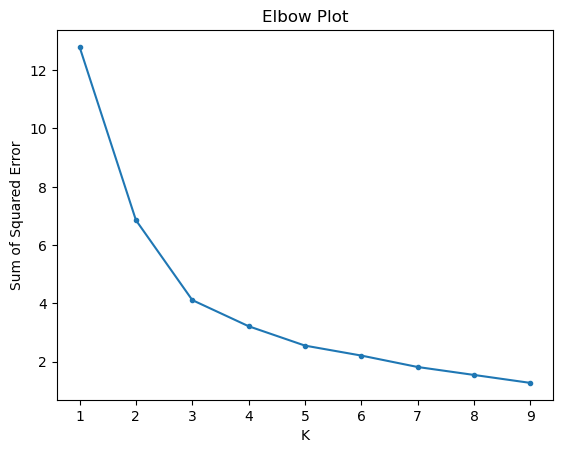

In [97]:
plt.plot(k_rng,sse,marker = '.')
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Plot')

In [98]:
model = KMeans(n_clusters = 3)

In [99]:
y_predict = model.fit_predict(x)

C:\Users\US593\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\US593\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [100]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [101]:
x['cluster'] = y_predict

In [104]:
x1 = x[x['cluster'] == 0]
x2 = x[x['cluster'] == 1]
x3 = x[x['cluster'] == 2]

Text(0, 0.5, 'sepal_width')

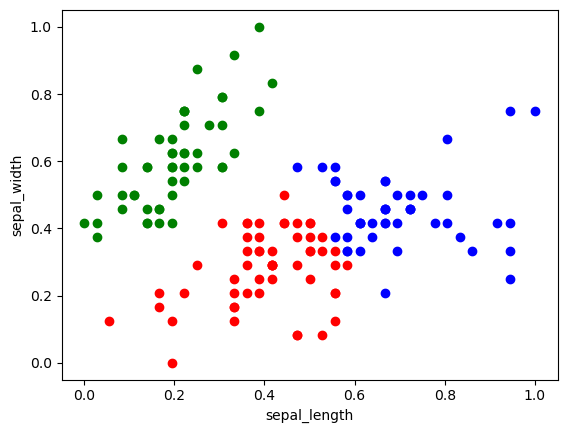

In [105]:
plt.scatter(x1.iloc[:,0],x1.iloc[:,1],color = 'red')
plt.scatter(x2.iloc[:,0],x2.iloc[:,1],color = 'green')
plt.scatter(x3.iloc[:,0],x3.iloc[:,1],color = 'blue')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

In [107]:
centroids = model.cluster_centers_ # centroids of every cluster

Text(0, 0.5, 'sepal_width')

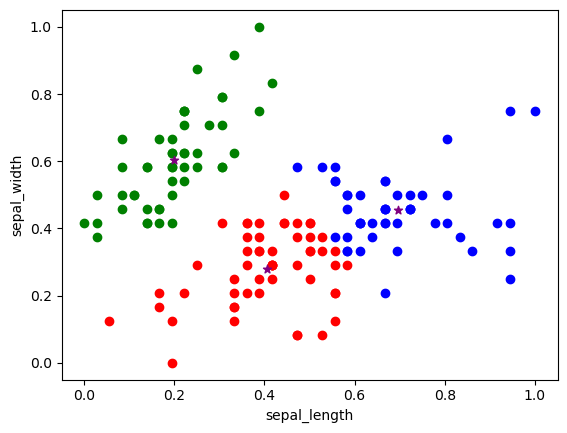

In [109]:
plt.scatter(x1.iloc[:,0],x1.iloc[:,1],color = 'red')
plt.scatter(x2.iloc[:,0],x2.iloc[:,1],color = 'green')
plt.scatter(x3.iloc[:,0],x3.iloc[:,1],color = 'blue')
plt.scatter(centroids[:,0],centroids[:,1],color = 'purple',marker = '*')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')